# Optical Band Gap Estimation Using Tauc Plot

This notebook demonstrates the estimation of optical band gap using the Tauc plot method,
which is widely used in the analysis of thin films and nanomaterials such as ZnO and
transparent conducting oxides (TCOs).

Author: P. R. Ratan Kumar  
Purpose: Preparation for PhD research in experimental materials physics


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Physical Background

#The optical band gap of a semiconductor can be estimated using the Tauc relation:

\[
(\alpha h\nu)^n = A(h\nu - E_g)
\]

where:
- \(\alpha\) is the absorption coefficient  
- \(h\nu\) is the photon energy  
- \(E_g\) is the optical band gap  
- \(n = 2\) for direct allowed transitions  

Here, we demonstrate the method using simulated absorption data.

## Simulated Absorption Data

In practice, absorption data are obtained from UV–Vis spectroscopy.
Here, simulated data are used to illustrate the Tauc plot method.

In [6]:
# Photon energy range (eV)
hv = np.linspace(2.0, 4.0, 100)

# Simulated band gap (eV)
Eg_true = 3.2

# Simulated absorption coefficient (direct band gap)
alpha = np.zeros_like(hv)
mask = hv > Eg_true
alpha[mask] = np.sqrt(hv[mask] - Eg_true)

## Absorption Coefficient vs Photon Energy

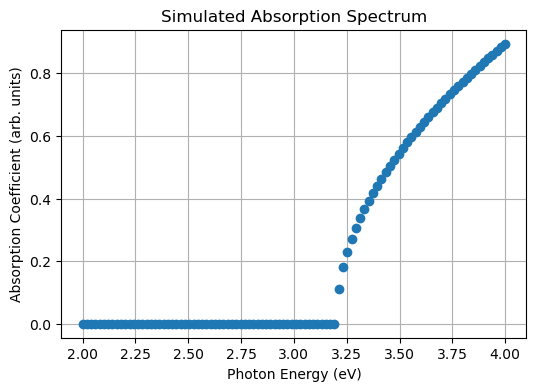

In [7]:
plt.figure(figsize=(6,4))
plt.plot(hv, alpha, 'o')
plt.xlabel("Photon Energy (eV)")
plt.ylabel("Absorption Coefficient (arb. units)")
plt.title("Simulated Absorption Spectrum")
plt.grid(True)
plt.show()

## Tauc Plot Construction

For a direct band gap semiconductor, a plot of \((\alpha h\nu)^2\) versus \(h\nu\)
should show a linear region near the absorption edge.

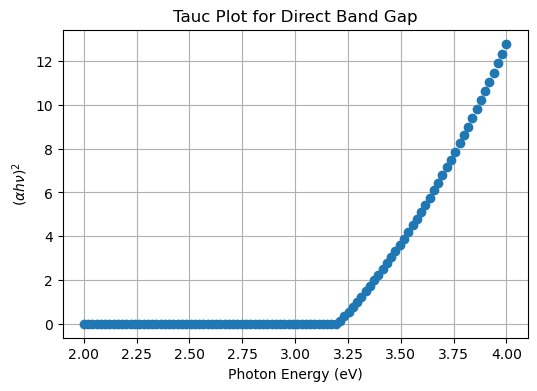

In [8]:
# Tauc variable for direct band gap
tauc_y = (alpha * hv)**2

plt.figure(figsize=(6,4))
plt.plot(hv, tauc_y, 'o')
plt.xlabel("Photon Energy (eV)")
plt.ylabel(r"$(\alpha h\nu)^2$")
plt.title("Tauc Plot for Direct Band Gap")
plt.grid(True)
plt.show()

## Band Gap Estimation

The optical band gap is obtained by extrapolating the linear portion of the Tauc plot
to the energy axis.

In [9]:
# Select linear region manually (near absorption edge)
mask = (hv > 3.25) & (hv < 3.6)

slope, intercept, r_value, _, _ = stats.linregress(hv[mask], tauc_y[mask])

# Extrapolated band gap
Eg_estimated = -intercept / slope

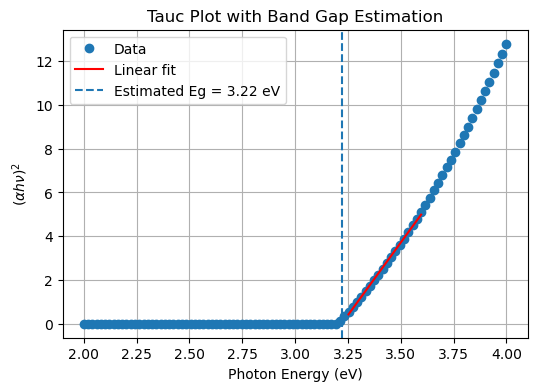

In [10]:
plt.figure(figsize=(6,4))
plt.plot(hv, tauc_y, 'o', label='Data')
plt.plot(hv[mask], slope*hv[mask] + intercept, 'r-', label='Linear fit')
plt.axvline(Eg_estimated, linestyle='--', label=f'Estimated Eg = {Eg_estimated:.2f} eV')
plt.xlabel("Photon Energy (eV)")
plt.ylabel(r"$(\alpha h\nu)^2$")
plt.title("Tauc Plot with Band Gap Estimation")
plt.legend()
plt.grid(True)
plt.show()

## Extracted Optical Band Gap

In [11]:
print(f"Estimated optical band gap: {Eg_estimated:.2f} eV")
print(f"Correlation coefficient (R): {r_value:.3f}")

Estimated optical band gap: 3.22 eV
Correlation coefficient (R): 0.999


## Physical Interpretation

The estimated optical band gap obtained from the Tauc plot is consistent with the
simulated value and falls within the typical range expected for wide band gap oxide
semiconductors such as ZnO and related TCO materials.

This method is routinely used in thin-film and nanomaterials research to analyze
optical properties and assess suitability for optoelectronic applications.

## Summary

This notebook demonstrated:
- Construction of a Tauc plot from optical absorption data
- Estimation of optical band gap for a direct band gap semiconductor
- Physical interpretation relevant to experimental materials physics

The workflow is directly applicable to thin-film and nanomaterials research.
